<a href="https://colab.research.google.com/github/michaelyoung1997/Development-of-AI-tools-to-link-climate-and-land-usage/blob/master/Surface_Temperature_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import packages and data** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn import linear_model
from sklearn.preprocessing import normalize as norm
from sklearn.preprocessing import scale
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import normalize as norm
from sklearn.preprocessing import scale
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
plt.rcParams.update({'font.size': 16})
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
top_blur=0
land_blur=0
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import random


2.3.0
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-96n8q7dr
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-96n8q7dr
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0dcf6d428a23727780cedcb671ebd9791b1b6f106_-cp36-none-any.whl size=133393 sha256=f28606e80d2ca9b3ed66d6c808a708c506061c39d6e425a21e0d89bfffdec658
  Stored in directory: /tmp/pip-ephem-wheel-cache-bi0zo52b/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
path='/content/drive/My Drive/Project/'

In [ ]:
# lst_both=pd.read_csv(path+'lst_both.csv', index_col=0)
# lst07_ge=pd.read_csv(path+'lst07_gee.csv', index_col=0)


land_blur=7
lst07=pd.read_csv(path+'lst07_gb'+str(land_blur)+'.csv', index_col=0)
lst15=pd.read_csv(path+'lst15_gb'+str(land_blur)+'.csv', index_col=0)

targets=pd.read_csv(path+'targets.csv', index_col=0)

lst15_smallblur=pd.read_csv(path+'lst15_smallblur.csv', index_col=0)

#gb 1,3,5,7,11

targets['Feb_diff']=targets['Feb_2007_LST']-targets['Feb_2015_LST']
targets['Jul_diff']=targets['Jul_2007_LST']-targets['Jul_2015_LST']
targets['Nov_diff']=targets['Nov_2007_LST']-targets['Nov_2015_LST']
targets['LST_diff']=targets['LST_2007']-targets['LST_2015']

crops=pd.read_csv(path+'crops.csv', index_col=0)
# lst15=pd.concat([lst15, crops], axis=1, join='inner')
# lst07=pd.concat([lst07, crops], axis=1, join='inner')



topography_gb=pd.read_csv(path+'topographygb.csv')
top_blur=1
topography2=pd.read_csv(path+'topography4_gb'+str(top_blur)+'.csv')

# #gb 1,3,5,7,15

lst15.drop(['topography_sobel'],axis=1, inplace=True)
lst07.drop(['topography_sobel'],axis=1, inplace=True)

lst15=pd.concat([lst15,  topography2['topography4'], topography_gb['topography_sobel']], axis=1, join='inner')
lst07=pd.concat([lst07,  topography2['topography4'], topography_gb['topography_sobel']], axis=1, join='inner')

lst15=lst15[['Northing',
 'Easting',
 'elevation',
 'Broadleaf woodland',
 'Coniferous woodland',
 'Arable ',
 'Improved Grassland',
 'Semi-natural grassland',
 'Mountain Heath',
 'Saltwater',
 'Freshwater',
 'Coastal',
 'Built-up/gardens',
 'pop_density',
 'Feb_2015_EVI',
 'Jul_2015_EVI',
 'Nov_2015_EVI',
 'Inland',
 'Mineral',
 'Organic Mineral',
 'Organic',
 'topography4',
 'topography_sobel']]

lst07=lst07[['Northing',
'Easting',
'elevation',
'Broadleaf woodland',
'Coniferous woodland',
'Arable ',
'Improved Grassland',
'Semi-natural grassland',
'Mountain Heath',
'Saltwater',
'Freshwater',
'Coastal',
'Built-up/gardens',
'pop_density',
'Feb_2007_EVI',
'Jul_2007_EVI',
'Nov_2007_EVI',
'Inland',
'Mineral',
'Organic Mineral',
'Organic',
'topography4',
'topography_sobel']]
lst15.drop([5656, 5235], inplace=True)

**Define Model Class**

In [ ]:
class my_model(): 
  def __init__(self, dataset, target):
    
    combined=pd.concat([dataset, targets[target]], join='inner', axis=1)
    
    self.target=target
    self.x=combined.drop(target, axis=1)
    self.y= combined[target]
  
  def regression(self, method='boost', poly=1, features=['Northing', 'Easting', 'elevation']):
    poly=PolynomialFeatures(poly)
    #select which features to regres
    self.features=features
    #polynomial features
    x=poly.fit_transform(self.x[features]) 
    #train test split 
    x_train, x_test, y_train, y_test = train_test_split(x, self.y, test_size=0.2, random_state=None)

    #gradient boost

    if method=='boost':
      predict=GradientBoostingRegressor( validation_fraction=0.2).fit(x_train, y_train)
      print('R2= ', predict.score(x_test, y_test))
      print(predict.feature_importances_)

    #bootstrap aggregation
      

    elif method =='bag':
      predict = BaggingRegressor(base_estimator=linear_model.LassoCV(max_iter=3500, normalize=True, selection='random'),   warm_start=True, n_estimators=100,  random_state=None).fit(x_train, y_train)
      print('R2= ', predict.score(x_test, y_test))
      print(predict)

    #Cross Validated LASSO
    elif method =='lasso':
      predict=linear_model.LassoCV(max_iter=2500, normalize=True, selection='random', n_alphas=200).fit(x_train, y_train)
      print('R2= ', predict.score(x_test, y_test))
      print(predict.coef_)

    else: 
      print('method not recognised')


    self.ypred=predict.predict(x)

    plt.scatter(predict.predict(x_test), y_test)
    plt.plot([min(y_test)-100,max(y_test)+100], [min(y_test)-100,max(y_test)+100])
    plt.title('Regression scatter plot')

    plt.xlim=(13500,14500)
    plt.ylim=(13500,14500)

  def residuals(self, binary=True):
    residual=self.y-self.ypred

    if binary==True:
      self.binary_residual=np.asarray(list(residual>0)).astype(int)
      return self.binary_residual
    else: 
      return np.asarray(residual)

  def classify_residuals(self, poly=1, epoch=800, classifier='nn', feature_select=None, r=0.5):
    features=self.features
    self.classifier=classifier

    #select only certain features (using boolean array)
    self.feature_select=feature_select
    self.poly=poly
    poly=PolynomialFeatures(poly)

    #classify residuals using features not used in regression
    self.non_spatial=self.x.drop(features, axis=1)

    if feature_select==None:
      X_train, X_test, r_train, r_test = train_test_split(poly.fit_transform(self.non_spatial), self.binary_residual, test_size=0.1, random_state=None)
    if feature_select != None:
      X_train, X_test, r_train, r_test = train_test_split(poly.fit_transform(self.non_spatial)[: ,feature_select], self.binary_residual, test_size=0.1, random_state=None)

    y_train=np.asarray(list(r_train>0)).astype(int)
    y_test=np.asarray(list(r_test>0)).astype(int)

    #scale data
    nX_train = scale(X_train)
    nX_test = scale(X_test)
    self.nx_test=nX_test
    self.y_test=y_test
    self.r_test=r_test 


    #MLP Neural Network
    if classifier=='nn':
      act=LeakyReLU() 
      # act='relu'

      #define minimisers
      sgd = SGD(lr=0.006, momentum=0.7, nesterov=True)
      rms=RMSprop(learning_rate=0.007) 
      adam=Adam()

      #
      model = Sequential()
      model.add(Dense(60, activation=act, kernel_initializer='he_normal'))
      model.add(Dropout(rate=r))
      BatchNormalization()
      model.add(Dense(50, activation=act, kernel_initializer='he_normal'))
      model.add(Dropout(rate=r))
      BatchNormalization()
      model.add(Dense(40, activation=act, kernel_initializer='he_normal'))
      model.add(Dropout(rate=r))
      BatchNormalization()
      model.add(Dense(30, activation=act, kernel_initializer='he_normal'))
      model.add(Dropout(rate=r))
      BatchNormalization()
      model.add(Dense(20, activation=act, kernel_initializer='he_normal'))
      model.add(Dropout(rate=r))
      BatchNormalization()
      model.add(Dense(10, activation=act, kernel_initializer='he_normal'))
      model.add(Dropout(rate=r))
      model.add(Dense(5, activation=act, kernel_initializer='he_normal'))
      model.add(Dropout(rate=r))
      model.add(Dense(1, activation='sigmoid'))


      #Early Stopping
      early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',
                                min_delta=0,
                                patience=350,
                                verbose=0, mode='auto')


      #Learning Rate Schedule
      def scheduler(epoch, lr):
        if epoch < 300:
          return lr
        else:
          return lr * 0.992

      lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)


      # compile the model
      model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['binary_accuracy'])
      

      # fit the model
      history = model.fit(
        np.asarray(nX_train), np.asarray(y_train),
        epochs=epoch, validation_split = 0.15, verbose=0, batch_size=32,
        callbacks=[tfdocs.modeling.EpochDots(), lr_schedule, early_stop])


      # evaluate the model
      loss, acc = model.evaluate(nX_test, np.asarray(y_test), verbose=0)
      self.acc=acc
      print('\n Test Accuracy: %.3f' % acc)
      # make a prediction
      self.model=model

      y_pred = [1 * (x[0]>=0.5) for x in model.predict(nX_test)]

      print(sklearn.metrics.confusion_matrix(y_test, y_pred))

      fig, axs = plt.subplots(1,3,figsize=(20,7))
      # summarize history for accuracy
      axs[0].plot(history.history['binary_accuracy'])
      axs[0].plot(history.history['val_binary_accuracy'])
      axs[0].set_title('model accuracy')
      axs[0].set_ylabel('accuracy')
      axs[0].set_xlabel('epoch')
      axs[0].legend(['train', 'test'], loc='upper left')

      # summarize history for loss
      axs[1].plot(history.history['loss'])
      axs[1].plot(history.history['val_loss'])
      axs[1].set_title('model loss')
      axs[1].set_ylabel('loss')
      axs[1].set_xlabel('epoch')
      axs[1].legend(['train', 'test'], loc='upper left')


      #ROC Curve
      fpr, tpr, thresholds_keras = roc_curve(y_test, y_pred, )
      axs[2].plot(fpr, tpr)
      axs[2].set_title('ROC')
      axs[2].set_ylabel('True Positive Rate')
      axs[2].set_xlabel('False Positive Rate')
      
      print('AUC = ', auc(fpr, tpr))


      #Add score to table
      scores=pd.read_csv(path+'nn_scores.csv')
      if feature_select==None: 
        reduced='No'
      else:
        reduced='0.15'


      scores=scores[['Month', 'Binary Accuracy', 'Feature Select', 'Landcover_blur', 'top_blur', 'dropout']]
      scores=scores.append(pd.DataFrame(data=[[self.target, acc, reduced, land_blur, top_blur, r]], columns=['Month', 'Binary Accuracy', 'Feature Select', 'Landcover_blur', 'top_blur', 'dropout']), ignore_index=True)
      scores.to_csv(path+'nn_scores.csv')





    #XGBoost Classifier
    elif classifier=='xgboost':
      clf = XGBClassifier(n_estimators=300,).fit(nX_train, y_train)
      self.model=clf
      self.acc=clf.score(nX_test, y_test)

      print('Binary accuracy =', self.acc)

    #Random Forest Classifier
    elif classifier=='rf':
      clf = RandomForestClassifier(max_depth=5, random_state=None, n_estimators=300).fit(nX_train, y_train)     
      self.model=clf
      self.acc=clf.score(nX_test, y_test)

      print('Binary accuracy =', self.acc)


  def importances(self):
    #Generate Polynomial INteraction Names
    def get_featurenames(X):
      poly_names=[[1]]
      for feature in list(X.columns):
        poly_names[0].append(feature)
      dummy=list(X.columns)
      for feature in list(X.columns):
        poly_names.append([str(feature)+'_'+str(dummy_feature) for dummy_feature in dummy])
        dummy=dummy[1:]
      poly_list = []
      for sublist in poly_names:
        for item in sublist:
            poly_list.append(item)
      return poly_list 

    names=np.asarray(get_featurenames(self.non_spatial))
    score=[]

    #Perform Gini Permuations
    if self.classifier=='nn':
      for i in range(self.nx_test.shape[1]):
        nX_val=self.nx_test
        accuracies=[]
        for j in range(10):
          # nX_val[:,i]=np.random.uniform(low=-1, high=1, size=(nX_val.shape[0],))
          # nX_val[:,i]=np.zeros(nX_val.shape[0])
          
          # nX_val[:,i]=scale(X=np.random.uniform(low=-1, high=1, size=(nX_val.shape[0],)), with_mean=mean, with_std=std)
          # nX_val[:,i]=std*(np.random.uniform(low=-1, high=1, size=(nX_val.shape[0],)))+mean
          random.shuffle((nX_val[:,i]))



          vloss, vacc = self.model.evaluate(nX_val, np.asarray(self.y_test), verbose=0)
          accuracies.append(vacc)
        
        score.append(np.mean(accuracies))
    


    elif self.classifier=='xgboost':
      for i in range(self.nx_test.shape[1]):
        nX_val=self.nx_test
        accuracies=[]
        for j in range(100):
          # nX_val[:,i]=np.random.uniform(low=-1, high=1, size=(nX_val.shape[0],))
          nX_val[:,i]=np.zeros(nX_val.shape[0])


          # random.shuffle((nX_val[:,i]))


          vacc = self.model.score(nX_val, np.asarray(self.y_test))
          accuracies.append(vacc)
        
        score.append(np.mean(accuracies))

    elif self.classifier=='rf':
      score=[]
      for i in range(5):
        score.append(self.model.feature_importances_) 
      score=np.mean(np.asarray(score), axis=0)

      return pd.Series(score , index=names)
      
    

    def recip(x):
      return (self.acc-x)/self.acc**2 


    poly=PolynomialFeatures(self.poly)
    score=list(map(recip, score))
    # correlation=list(pd.concat([pd.DataFrame(self.non_spatial), self.y])], join='inner', axis=1).corr()[str(self.target)])[:-1]
    corr=list(pd.concat([pd.DataFrame(index=self.non_spatial.index, data=poly.fit_transform(self.non_spatial)), self.y], join='inner', axis=1).corr()[str(self.target)])[:-1]
                           
    if self.poly==2: 
      if self.feature_select==None: 
        frame=pd.DataFrame(score , index=names)
        frame['corr']=corr

        return  frame[1:]
      else:
        return  pd.Series(score , index=list(names[np.asarray(self.feature_select)]))

    elif self.poly==1:
      return  pd.Series(score[1:] , index=self.non_spatial.columns)

 

    
    



**Use the model**

R2=  0.802837525717067
[0.00000000e+00 7.06689433e-01 6.27967449e-02 1.91723035e-01
 8.18995698e-03 4.78948729e-03 7.66349685e-03 1.75452125e-02
 1.40720894e-04 1.13916141e-04 3.47996397e-04]
Binary accuracy = 0.5632780082987552
                                            0      corr
Nov_2007_EVI_Nov_2007_EVI            0.290983  0.474847
pop_density_pop_density              0.287713  0.130191
Built-up/gardens_Nov_2007_EVI        0.287713  0.311210
Built-up/gardens_pop_density         0.287713  0.162012
Saltwater_pop_density                0.281174  0.045925
pop_density_Nov_2007_EVI             0.281174  0.227587
Freshwater_Built-up/gardens          0.281174  0.071573
Freshwater_Freshwater                0.281174 -0.073777
Saltwater_Nov_2007_EVI               0.281174  0.039263
Mountain Heath_Nov_2007_EVI          0.271366 -0.471057
Saltwater_Freshwater                 0.271366  0.003002
Saltwater_Built-up/gardens           0.271366  0.051219
Saltwater_Saltwater                  0.2713

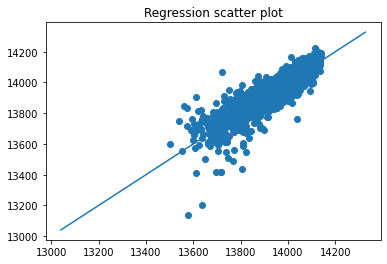

In [ ]:
#Feb
# model1=my_model(lst15.drop(['Jul_2015_EVI', 'Nov_2015_EVI'], axis=1), 'Feb_2015_LST')

#July
# model1=my_model(lst15.drop(['Feb_2015_EVI', 'Nov_2015_EVI'], axis=1), 'Jul_2015_LST')

#Nov
model1=my_model(lst07.drop(['Feb_2007_EVI', 'Jul_2007_EVI'], axis=1), 'Nov_2007_LST')

model1.regression(method='boost', poly=1, features=['Northing', 'Easting', 'elevation', 'Inland', 'topography_sobel', 'topography4', 'Organic', 'Organic Mineral', 'Mineral', 'Coastal'])
# model1.regression(method='boost', poly=1)
model1.residuals(binary=True) 
model1.classify_residuals(classifier='xgboost', poly=2) 
frame=model1.importances() 


#Display all feature importances (rather than head)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
  frame=frame.sort_values(by=list(frame)[0], ascending=False)
  print(frame[frame[0]>0.15])

In [ ]:
pd.concat([lst15, targets['Jul_2015_LST']], join='inner', axis=1).corr() 

,Northing,Easting,elevation,Broadleaf woodland,Coniferous woodland,Arable,Improved Grassland,Semi-natural grassland,Mountain Heath,Saltwater,Freshwater,Coastal,Built-up/gardens,pop_density,Feb_2015_EVI,Jul_2015_EVI,Nov_2015_EVI,Inland,Mineral,Organic Mineral,Organic,topography4,topography_sobel,Jul_2015_LST
Northing,1.000000,0.505021,-0.365038,0.501904,-0.402431,0.394868,0.502527,-0.250651,-0.683329,-0.106697,-0.350649,-0.003342,0.335386,0.149501,0.465868,0.015871,0.285542,0.264586,0.082725,-0.020110,-0.063346,-0.009089,0.008133,0.640755
Easting,0.505021,1.000000,-0.390277,0.292249,-0.355549,0.708188,0.051223,-0.367161,-0.468805,-0.123644,-0.280017,-0.052970,0.351568,0.150307,0.217590,-0.085474,0.373924,0.334386,0.179257,-0.098106,-0.101402,-0.044337,-0.017748,0.747055
elevation,-0.365038,-0.390277,1.000000,-0.245687,0.353235,-0.512880,-0.213074,0.633565,0.538256,-0.032050,0.154547,-0.193944,-0.312190,-0.167302,-0.535760,-0.093550,-0.244596,0.079163,-0.128962,-0.026124,0.237225,0.110705,0.013386,-0.422536
Broadleaf woodland,0.501904,0.292249,-0.245687,1.000000,-0.135314,0.084712,0.418785,-0.245237,-0.429078,-0.064186,-0.142861,-0.059433,0.320510,0.107230,0.267461,0.075205,0.195701,0.120011,0.018603,0.046071,-0.069040,-0.025624,0.012756,0.323677
Coniferous woodland,-0.402431,-0.355549,0.353235,-0.135314,1.000000,-0.412532,-0.259683,0.396856,0.218704,0.068550,0.157179,-0.090825,-0.292388,-0.140700,-0.137211,-0.006109,-0.276595,-0.130854,-0.101570,0.026232,0.106581,0.007396,0.018910,-0.454641
Arable,0.394868,0.708188,-0.512880,0.084712,-0.412532,1.000000,-0.075402,-0.478044,-0.491091,-0.104417,-0.240412,-0.039782,0.122508,0.007670,0.240082,0.030051,0.245824,0.241819,0.272445,-0.108826,-0.234573,-0.027291,-0.006767,0.574745
Improved Grassland,0.502527,0.051223,-0.213074,0.418785,-0.259683,-0.075402,1.000000,-0.214190,-0.500641,-0.175066,-0.317000,-0.023498,0.069510,-0.007426,0.584084,0.500058,0.489958,0.189273,-0.168105,0.184029,0.031763,-0.016218,0.011893,0.165595
Semi-natural grassland,-0.250651,-0.367161,0.633565,-0.245237,0.396856,-0.478044,-0.214190,1.000000,0.186018,0.010423,0.197770,-0.110633,-0.308498,-0.143507,-0.356501,0.018103,-0.303100,-0.044241,-0.241407,0.007317,0.343525,0.022439,0.011383,-0.392353
Mountain Heath,-0.683329,-0.468805,0.538256,-0.429078,0.218704,-0.491091,-0.500641,0.186018,1.000000,0.082861,0.386037,-0.099300,-0.318387,-0.147004,-0.569288,-0.298621,-0.262164,-0.149203,0.035414,-0.096130,0.049459,0.000815,-0.006694,-0.444420
Saltwater,-0.106697,-0.123644,-0.032050,-0.064186,0.068550,-0.104417,-0.175066,0.010423,0.082861,1.000000,0.027786,0.159505,-0.029740,-0.002818,-0.119993,-0.154406,-0.185339,-0.235657,0.061540,-0.033407,-0.065318,0.054979,0.031015,-0.118155


**LASSO Regression**

In [ ]:
combined=pd.concat([lst07, targets['Nov_2007_LST']], axis=1,join='inner')
poly=PolynomialFeatures(2)

X_train, X_test, y_train, y_test=train_test_split(poly.fit_transform(combined.drop(['Nov_2007_LST', 'Northing', 'Easting', 'elevation', 'Feb_2007_EVI', 'Jul_2007_EVI'], axis=1)), combined['Nov_2007_LST'])
nX_train=scale(X_train)
nX_test=scale(X_test)
# boost=GradientBoostingRegressor().fit(nX_train, y_train)
coefs=[]
for i in range(5):
  lasso=LassoCV(n_alphas=100, normalize=True, max_iter=3500).fit(nX_train, y_train)
  lasso.score(nX_test, y_test)
  coefs.append(lasso.coef_)

coefs=np.mean(coefs, axis=0)
  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21924.78453265503, tolerance: 13123.081870128588
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21924.78453265503, tolerance: 13123.081870128588
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21924.78453265503, tolerance: 13123.081870128588
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21924.784

<BarContainer object of 190 artists>

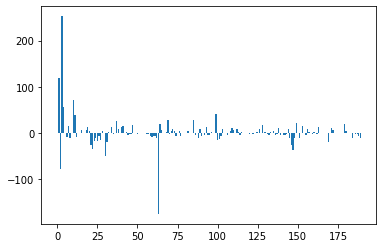

In [ ]:
plt.bar(range(len(lasso.coef_)), coefs) 

**Big Test**


Run repeated test to find best parameters for model. 
In this test, I vary the landcover blur size, the topographic blur size, the model month, dropout and selected features. All results get written to a file in the google drive. 

R2=  0.7888618317449467
[0.         0.73130977 0.07024305 0.19844718]

Epoch: 0, binary_accuracy:0.5168,  loss:0.9260,  val_binary_accuracy:0.5496,  val_loss:0.6910,  
....................................................................................................
Epoch: 100, binary_accuracy:0.6689,  loss:0.6023,  val_binary_accuracy:0.6372,  val_loss:0.6503,  
....................................................................................................
Epoch: 200, binary_accuracy:0.7042,  loss:0.5672,  val_binary_accuracy:0.6349,  val_loss:0.6509,  
....................................................................................................
Epoch: 300, binary_accuracy:0.7311,  loss:0.5399,  val_binary_accuracy:0.6449,  val_loss:0.6577,  
....................................................................................................
Epoch: 400, binary_accuracy:0.7434,  loss:0.5080,  val_binary_accuracy:0.6472,  val_loss:0.7138,  
................................

KeyboardInterrupt: ignored

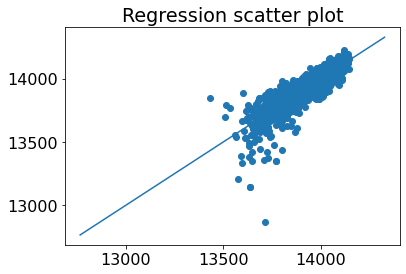

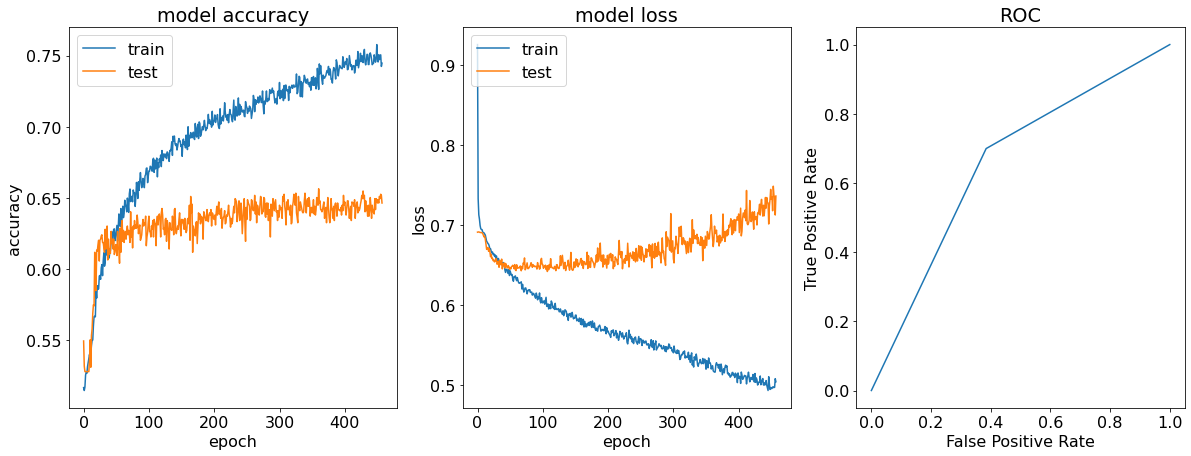

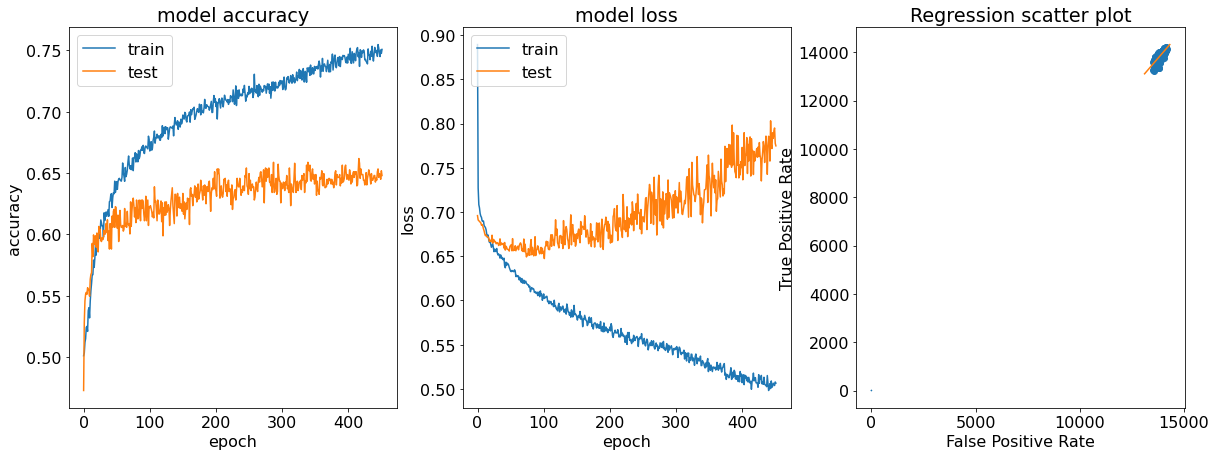

Error in callback <function flush_figures at 0x7f64aeda8840> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:


lblurs=[15,9,11,7,5] 
tblurs=[1,3] 

months=['nov', 'feb', 'jul']
crops=pd.read_csv(path+'crops.csv', index_col=0)
topography_gb=pd.read_csv(path+'topographygb.csv')
dropouts=[0.3,0.4,0.5]

for index in range(5):
  for i in lblurs:
    for j in tblurs: 

      land_blur=i
      top_blur=j

      lst07=pd.read_csv(path+'lst07_gb'+str(land_blur)+'.csv', index_col=0)
      lst15=pd.read_csv(path+'lst15_gb'+str(land_blur)+'.csv', index_col=0)
      topography2=pd.read_csv(path+'topography4_gb'+str(top_blur)+'.csv')
      lst15.drop(['topography_sobel'],axis=1, inplace=True)
      lst07.drop(['topography_sobel'],axis=1, inplace=True)


      lst15=pd.concat([lst15,  topography2['topography4'], topography_gb['topography_sobel'], crops], axis=1, join='inner')
      lst07=pd.concat([lst07,  topography2['topography4'], topography_gb['topography_sobel'], crops], axis=1, join='inner')




      for month in months:
        for dropout in dropouts:

          if month=='feb':
            model=my_model(lst15.drop(['Jul_2015_EVI', 'Nov_2015_EVI'], axis=1), 'Feb_2015_LST')

          elif month=='jul':
            model=my_model(lst15.drop(['Feb_2015_EVI', 'Nov_2015_EVI'], axis=1), 'Jul_2015_LST')

          elif month=='nov':
            model=my_model(lst07.drop(['Feb_2007_EVI', 'Jul_2007_EVI'], axis=1), 'Nov_2007_LST')

          model.regression(method='boost', poly=1)
          model.residuals(binary=True) 
          model.classify_residuals(classifier='nn', poly=2, r=dropout) 
          frame=model.importances() 
          model.classify_residuals(classifier='nn', poly=2, feature_select=list(frame>0.15), r=dropout) 














# #gb 1,3,5,7,15



**Predicting LST using just Land Cover Data**

R2=  0.8233788252394502
[0.00000000e+00 5.22410599e-01 3.22095203e-02 1.08807971e-03
 8.23316385e-04 2.53963824e-02 2.92546288e-02 2.90621745e-02
 1.81692707e-01 2.56023401e-03 2.20291459e-03 1.21331708e-03
 1.14772232e-02 1.05456324e-01 2.68548163e-02 7.53298622e-03
 8.52513628e-03 6.84037864e-03 3.02511315e-03 2.37401984e-03
 0.00000000e+00 0.00000000e+00 1.28295840e-07]


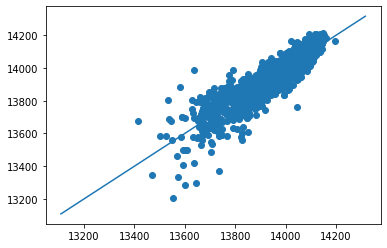

In [ ]:
model1=my_model(lst07, 'Nov_2007_LST')
model1.regression(features=lst07.columns.drop([]), method='boost', poly=1)
# model1.regression(method='boost', poly=1)
# model1.residuals(binary=True) 
# model1.classify_residuals(epoch=800, poly=2, classifier='nn') 
# frame=model1.importances()


**Covariance Matrix**

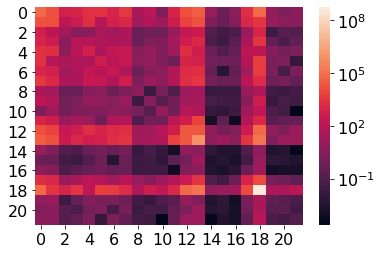

In [ ]:
covariance=np.abs(np.cov(lst15.T))
import seaborn as sns
from matplotlib.colors import LogNorm

sns.heatmap(covariance, norm=LogNorm(vmin=covariance.min(), vmax=covariance.max()))
# plt.imshow(covariance)

**Correlation Matrix**

In [ ]:
lst15.corr() 

,Northing,Easting,Broadleaf woodland,Coniferous woodland,Arable,Improved Grassland,Semi-natural grassland,Mountain Heath,Saltwater,Freshwater,Coastal,Built-up/gardens,elevation,pop_density,Feb_2015_EVI,Jul_2015_EVI,Nov_2015_EVI,Inland,topography,Mineral,Organic Mineral,Organic
Northing,1.000000,0.511104,0.428000,-0.342230,0.382136,0.449826,-0.226766,-0.657615,-0.064548,-0.260950,0.003018,0.295383,-0.371836,0.152541,0.474209,0.034043,0.291878,0.266554,0.011714,0.078714,-0.017279,-0.058101
Easting,0.511104,1.000000,0.240839,-0.307840,0.679808,0.033173,-0.333108,-0.463941,-0.076202,-0.214388,-0.055001,0.300796,-0.391046,0.153721,0.233581,-0.065550,0.382063,0.336661,-0.001127,0.177146,-0.095201,-0.097999
Broadleaf woodland,0.428000,0.240839,1.000000,-0.076991,0.042431,0.352608,-0.255422,-0.389427,-0.048265,-0.100208,-0.058173,0.211938,-0.256749,0.073112,0.267521,0.112914,0.179204,0.070060,0.007704,-0.008916,0.072992,-0.066727
Coniferous woodland,-0.342230,-0.307840,-0.076991,1.000000,-0.364419,-0.254055,0.257998,0.142202,0.024020,0.096608,-0.073814,-0.236033,0.281595,-0.129014,-0.076572,-0.034497,-0.252736,-0.117964,0.012829,-0.072510,0.014118,0.083632
Arable,0.382136,0.679808,0.042431,-0.364419,1.000000,-0.090669,-0.436329,-0.473245,-0.071529,-0.188951,-0.032424,0.050122,-0.517038,-0.022837,0.256955,0.062277,0.234887,0.196707,-0.000266,0.260791,-0.107193,-0.217844
Improved Grassland,0.449826,0.033173,0.352608,-0.254055,-0.090669,1.000000,-0.271264,-0.485390,-0.119791,-0.226311,-0.038570,0.003256,-0.261183,-0.034913,0.595788,0.537893,0.506349,0.125479,0.011218,-0.172978,0.214166,-0.001736
Semi-natural grassland,-0.226766,-0.333108,-0.255422,0.257998,-0.436329,-0.271264,1.000000,0.133157,-0.018241,0.113068,-0.097803,-0.259847,0.622511,-0.137106,-0.365489,0.003872,-0.304985,-0.045656,0.013092,-0.214616,-0.007204,0.328339
Mountain Heath,-0.657615,-0.463941,-0.389427,0.142202,-0.473245,-0.485390,0.133157,1.000000,0.038086,0.264995,-0.076172,-0.284725,0.534234,-0.149274,-0.567995,-0.323165,-0.286621,-0.159590,-0.002995,0.064791,-0.125355,0.043936
Saltwater,-0.064548,-0.076202,-0.048265,0.024020,-0.071529,-0.119791,-0.018241,0.038086,1.000000,0.005878,0.192462,-0.003536,-0.055362,0.011320,-0.078497,-0.144501,-0.146100,-0.193198,-0.001173,0.029669,-0.024083,-0.050309
Freshwater,-0.260950,-0.214388,-0.100208,0.096608,-0.188951,-0.226311,0.113068,0.264995,0.005878,1.000000,-0.027424,-0.036882,0.072684,-0.016688,-0.276932,-0.231644,-0.208124,-0.072690,-0.010017,0.017052,-0.056817,-0.043313


**Correlation Matrix Plot** 

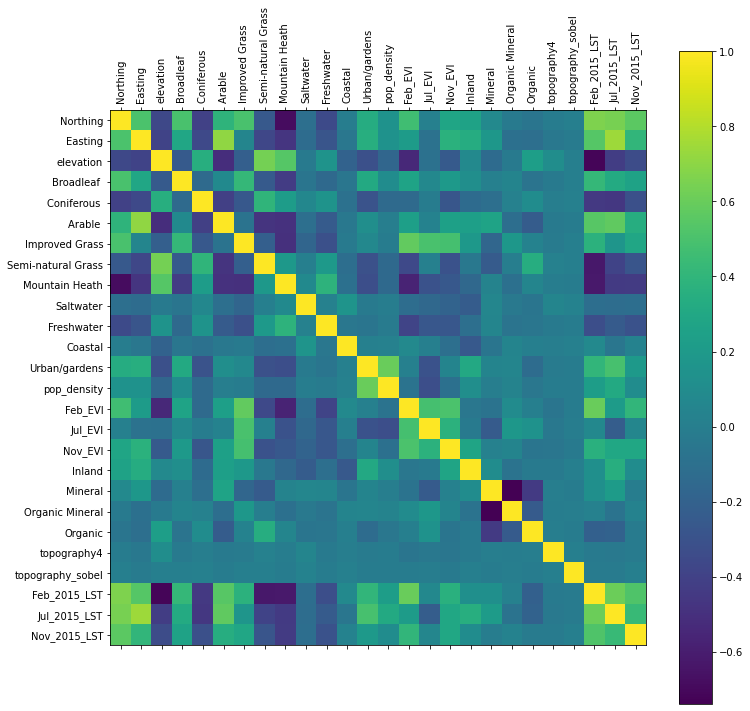

In [ ]:
plt.figure(figsize=(12,12))

total=pd.concat([lst15, targets[['Feb_2015_LST', 'Jul_2015_LST', 'Nov_2015_LST']]], join='inner', axis=1)
plt.matshow(total.corr(), fignum=0)
col_names=['Northing', 'Easting', 'elevation', 'Broadleaf ', 'Coniferous ',
       'Arable ', 'Improved Grass', 'Semi-natural Grass',
       'Mountain Heath', 'Saltwater', 'Freshwater', 'Coastal',
       'Urban/gardens', 'pop_density', 'Feb_EVI',
       'Jul_EVI', 'Nov_EVI', 'Inland', 'Mineral', 'Organic Mineral',
       'Organic', 'topography4', 'topography_sobel', 'Feb_2015_LST', 'Jul_2015_LST', 'Nov_2015_LST']
plt.xticks(range(len(total.columns)), col_names, rotation='vertical')
plt.yticks(range(len(total.columns)), col_names)
plt.colorbar()

# plt.show()

**Regression**

0.7855448116741568
[0.         0.2724539  0.02863816 0.03642243 0.41162035 0.03729128
 0.0027324  0.01465834 0.09023076 0.10595237]


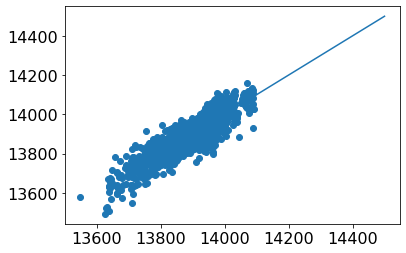

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
dodgy_stations=[]
import matplotlib.pyplot as plt
from sklearn import linear_model
poly=PolynomialFeatures(2)

combined=pd.concat([lst07,targets['Feb_2007_LST']], join='inner', axis=1)



x=poly.fit_transform(combined[['Northing', 'Easting', 'elevation']])
y=combined['Feb_2007_LST']

# x=poly.fit_transform(lst.drop(['Feb_2007_LST', 'July_2007_LST'], axis=1))


# x=land_use.drop(['Sum', 'Land'], axis=1).loc[month.drop(dodgy_stations).loc[month.count(axis=1)>20].index]
# x=poly.fit_transform(lst.drop(['Feb_2007_LST', 'July_2007_LST'], axis=1))

# y=targets['Feb_2007_LST']
# combined=pd.concat([x,y], join='inner', axis=1)
# print(combined)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

# space_predict = BaggingRegressor(base_estimator=linear_model.LassoCV(max_iter=3500, normalize=True, selection='random'),   warm_start=True, n_estimators=100,  random_state=None).fit(X_train, y_train)
# space_predict = linear_model.LassoCV(max_iter=2500, normalize=True, selection='random', n_alphas=100).fit(X_train, y_train)
space_predict=GradientBoostingRegressor(validation_fraction=0.2).fit(X_train, y_train)

print(space_predict.score(X_test, y_test))

space_residual=y-space_predict.predict(x)

plt.scatter(space_predict.predict(X_test), y_test)
plt.xlim=((13500,14500))
plt.ylim=((13500,14500))
plt.plot([13900,14500], [13900,14500])


print(space_predict.feature_importances_)
residual_binary=np.asarray(list(space_residual>0)).astype(int)
importances=[None] 


**View Residuals**

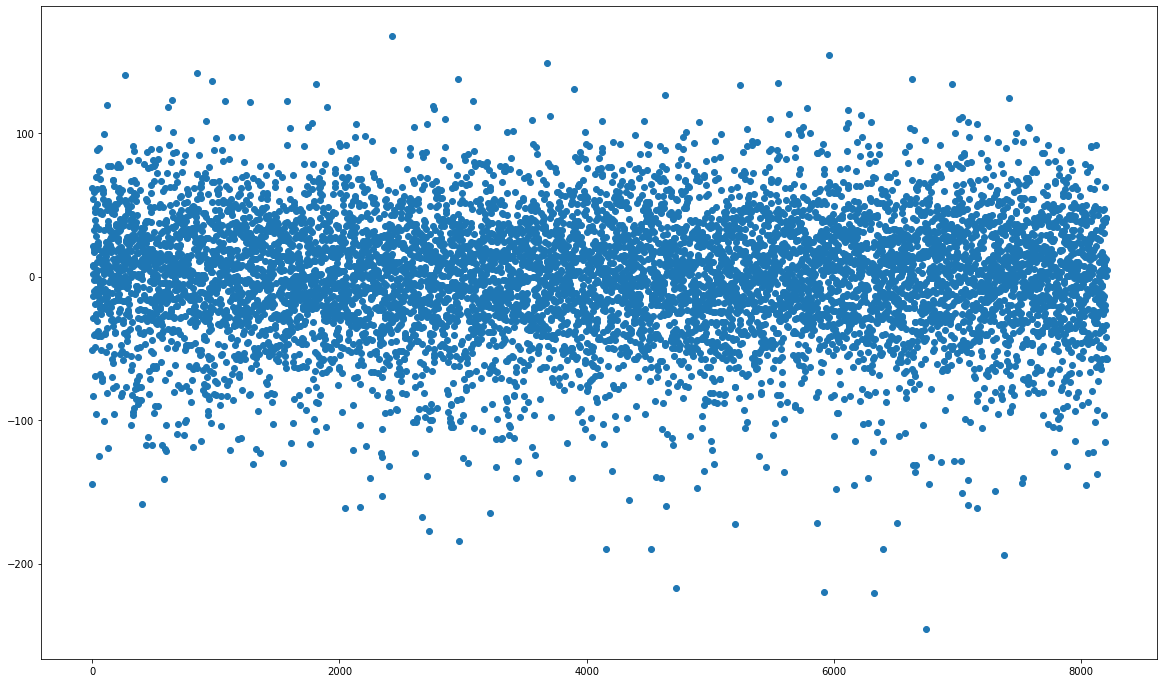

In [ ]:
# predict=linear_model.LassoCV(max_iter=2500, normalize=True, selection='random', n_alphas=100).fit(X_train, r_train)
# print(predict.score(X_test, r_test))
plt.figure(figsize=(20,12))
plt.scatter(range(np.shape(r_train)[0]), r_train)


**Visualise Predictions**

In [ ]:
y_test.shape

(964,)

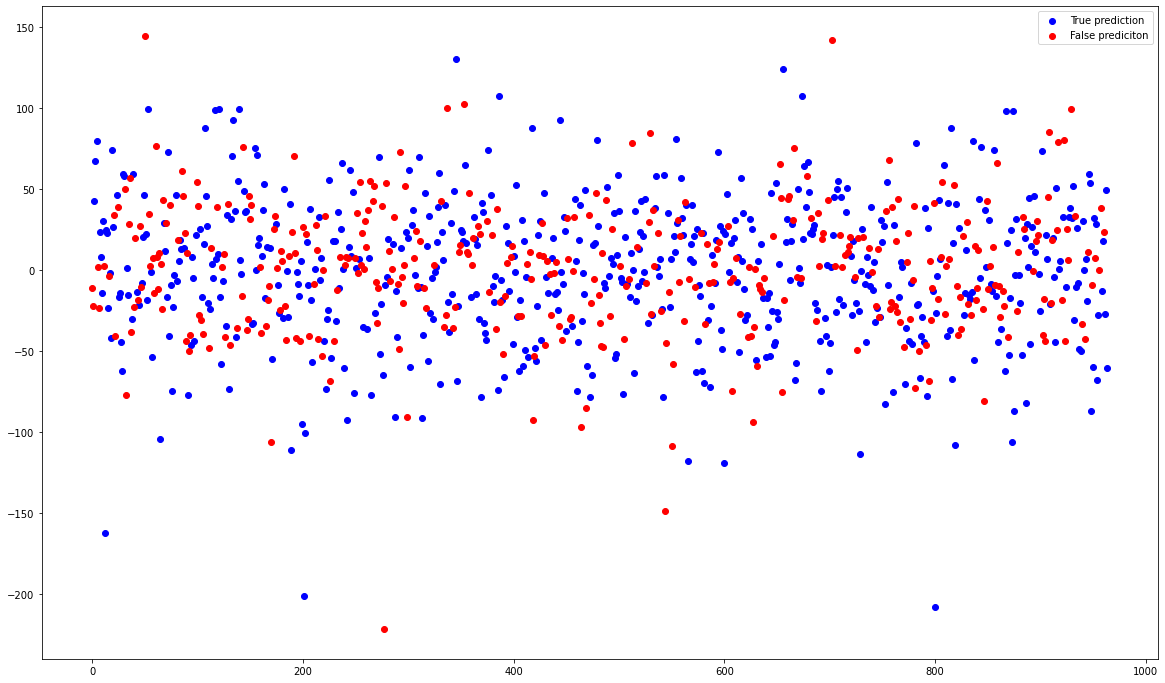

In [ ]:

plt.figure(figsize=(20,12))
plt.scatter(range(np.shape(r_test)[0]), np.where(y_pred==y_test, r_test, None), c='blue', label='True prediction')
plt.scatter(range(np.shape(r_test)[0]), np.where(y_pred==y_test, None, r_test), c='red', label='False prediciton')
plt.legend()


**LST Change**

In [ ]:
evi_feb_15=pd.read_csv(path+'evi_feb_15.csv')

In [ ]:
evi_2007=pd.read_csv(path+'EVI_2007.csv')
evi_2015=pd.read_csv(path+'EVI_2015.csv')
evi_2007.rename(columns={"EVI": "EVI_2007"}, inplace=True)
evi_2015.rename(columns={"EVI": "EVI_2015"}, inplace=True)

evi_change=pd.Series(evi_2007['EVI_2007']-evi_2015['EVI_2015'], name='EVI_change') 
evi=pd.concat([lst07[['Feb_2007_EVI', 'Jul_2007_EVI', 'Nov_2007_EVI']], lst15[['Feb_2015_EVI', 'Jul_2015_EVI', 'Nov_2015_EVI']], evi_2015['EVI_2015'], evi_2007['EVI_2007'], evi_change], axis=1, join='inner')
evi['Feb_change']=evi['Feb_2007_EVI']-evi['Feb_2015_EVI']
evi['Jul_change']=evi['Jul_2007_EVI']-evi['Jul_2015_EVI']
evi['Nov_change']=evi['Nov_2007_EVI']-evi['Nov_2015_EVI']
evi

,Feb_2007_EVI,Jul_2007_EVI,Nov_2007_EVI,Feb_2015_EVI,Jul_2015_EVI,Nov_2015_EVI,EVI_2015,EVI_2007,EVI_change,Feb_change,Jul_change,Nov_change
0,0.237948,0.350908,0.237948,0.266497,0.409058,0.184043,0.315381,0.320171,0.004789,-0.028549,-0.058150,0.053905
1,0.137649,0.308139,0.137649,0.162542,0.407614,0.111527,0.294169,0.299662,0.005493,-0.024893,-0.099474,0.026122
2,0.238271,0.223778,0.238271,0.186747,0.397120,0.138902,0.296096,0.287223,-0.008873,0.051524,-0.173342,0.099369
3,0.126493,0.335886,0.126493,0.204028,0.376539,0.124088,0.302382,0.302284,-0.000098,-0.077535,-0.040653,0.002405
4,0.149533,0.266729,0.149533,0.143604,0.277279,0.115658,0.231265,0.234192,0.002927,0.005929,-0.010550,0.033875
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.240806,0.291955,0.240806,0.198226,0.295441,0.135897,0.264750,0.278766,0.014016,0.042580,-0.003486,0.104909
9996,0.124496,0.253098,0.124496,0.160204,0.294875,0.066827,0.196331,0.198011,0.001680,-0.035708,-0.041777,0.057670
9997,0.196956,0.270083,0.196956,0.217372,0.318697,0.105915,0.277963,0.296263,0.018301,-0.020416,-0.048614,0.091041
9998,0.070320,0.166667,0.070320,0.073894,0.182156,0.010576,0.141935,0.139396,-0.002539,-0.003574,-0.015489,0.059745


0.4043903225190742


array([0.07595772, 0.16047945, 0.03834149, 0.41490592, 0.02843576,
       0.2002721 , 0.00378216, 0.00393435, 0.02051233, 0.02641101,
       0.02696772])

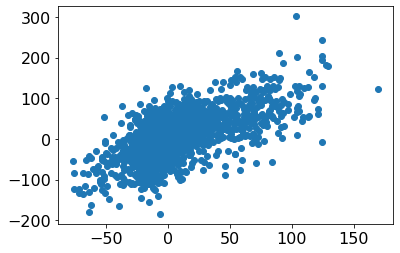

In [ ]:
lst_change=lst07.loc[:,'Broadleaf woodland': 'Built-up/gardens']-lst15.loc[:,'Broadleaf woodland': 'Built-up/gardens']
target='LST_diff'

lst_change=pd.concat([lst07.loc[:,'Broadleaf woodland': 'Built-up/gardens'], evi[['EVI_change']], targets[[target]]], axis=1, join='inner')


# lst_change=pd.concat([lst07, evi_change, targets['Feb_diff']], join='inner', axis=1)

# X_train, X_test, y_train, y_test = train_test_split(lst_change.drop('LST_2015', axis=1), lst_change['LST_2015'], test_size=0.2, random_state=None)
X_train, X_test, y_train, y_test = train_test_split(lst_change.drop(target, axis=1), lst_change[target], test_size=0.2, random_state=None)

predict=GradientBoostingRegressor(validation_fraction=0.2).fit(X_train, y_train)

# predict = BaggingRegressor(base_estimator=linear_model.LassoCV(max_iter=3500, normalize=True, selection='random'),   warm_start=True, n_estimators=100,  random_state=None).fit(X_train, y_train)
# predict = linear_model.LassoCV(max_iter=2500, normalize=True, selection='random', n_alphas=100).fit(X_train, y_train)

print(predict.score(X_test, y_test)) 
plt.scatter(predict.predict(X_test), y_test)
predict.feature_importances_

